# Life Expectancy

## 1. Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__

('1.26.4', '1.5.3')

In [3]:
matplotlib.__version__, sns.__version__

('3.8.4', '0.13.2')

## 2. Load data

In [4]:
df = pd.read_csv('../data/Cars.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape, df.info(), df.describe(), df.columns, df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


((8128, 13),
 None,
               year  selling_price     km_driven        seats
 count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
 mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
 std       4.044249   8.062534e+05  5.655055e+04     0.959588
 min    1983.000000   2.999900e+04  1.000000e+00     2.000000
 25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
 50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
 75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
 max    2020.000000   1.000000e+07  2.360457e+06    14.000000,
 Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
        'seats'],
       dtype='object'),
 name              object
 year               int64
 selling_price      int64
 km_driven          int64
 fuel              object
 seller_type       object
 transmission      object
 owner             object
 mileage         

## 3. EDA

In [7]:
#list column in csv file
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
# Display detailed information about the DataFrame, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [9]:
# Preview the first few rows of the DataFrame and see the columns
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [10]:
# Display summary statistics for numerical columns
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


In [11]:
# Map 'owner' feature
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [12]:
df['owner'] = df['owner'].map(owner_mapping)

In [13]:
# Show the first 10 rows of the DataFrame and see the column 'owner'
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,1,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [14]:
# Remove rows with 'CNG' and 'LPG' in the 'fuel' feature
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [15]:
# Show the first 10 rows of the DataFrame and see the column fuel, row 6 was deleted
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [16]:
# Convert 'mileage' to numerical type and remove 'kmpl'
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [17]:
# Show the first 10 rows of the DataFrame and see the column 'mileage'. The column 'mileage' was changed
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [18]:
# Remove 'CC' and ' '(blank before CC) to convert 'engine' to numerical type
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

In [19]:
# Show the first 10 rows of the DataFrame and see the column 'engine'. CC were removed out engine column
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.1 bhp,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45 bhp,248Nm@ 2250rpm,5.0


In [20]:
# Remove 'bhp' and convert 'max_power' to numerical type same 'engine' column
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

In [21]:
# Show the first 10 rows of the DataFrame and see the column 'max_power'. bhp were removed out max_power column
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,248Nm@ 2250rpm,5.0


In [22]:
#Rename column 'name' -> 'brand'
df.rename(columns = {'name':'brand'}, inplace=True)

In [23]:
# Take only the first word for 'brand' column, removed the rest also
df['brand'] = df['brand'].str.split(' ').str[0]

In [24]:
# Show the first 10 rows of the DataFrame and see the column 'brand'. It's only the first word
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,160Nm@ 2000rpm,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,248Nm@ 2250rpm,5.0


In [25]:
# Drop the 'torque' feature because profesor no need it ^_^
df = df.drop(columns=['torque'])

In [26]:
# Show the first 10 rows of the DataFrame without 'torque' column
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [27]:
# Show 10 rows from 4380 to 4390 in csv file to see cleanly for next question
print(df.iloc[4328:4338])

           brand  year  selling_price  km_driven    fuel seller_type  \
4380       Skoda  2017        1600000      33000  Petrol      Dealer   
4381     Hyundai  2014         395000     160000  Diesel      Dealer   
4382     Hyundai  2013         425000     101000  Diesel      Dealer   
4383  Volkswagen  2019        1350000       5400  Diesel      Dealer   
4384     Hyundai  2016        1950000      45000  Diesel      Dealer   
4385     Renault  2018         535000      31000  Petrol      Dealer   
4386     Renault  2018         500000      31000  Petrol      Dealer   
4387      Maruti  2016         434999      55000  Petrol      Dealer   
4388        Tata  2018         250000      55000  Petrol      Dealer   
4389     Hyundai  2014         700000     117000  Diesel      Dealer   

     transmission  owner  mileage  engine  max_power  seats  
4380    Automatic      2    14.70  1798.0     177.50    5.0  
4381       Manual      3    24.00  1120.0      70.00    5.0  
4382       Manual    

In [28]:
# Because Test Drive Cars so expensive so deleted all rows related to it, but above 'Test Drive Cars : 5'
df = df[df['owner'] != 5]

In [29]:
# The rows with 'Test Drive Cars : 5' in 'owner' were removed which located in number'4383' for above question
print(df.iloc[4328:4338])

        brand  year  selling_price  km_driven    fuel seller_type  \
4380    Skoda  2017        1600000      33000  Petrol      Dealer   
4381  Hyundai  2014         395000     160000  Diesel      Dealer   
4382  Hyundai  2013         425000     101000  Diesel      Dealer   
4384  Hyundai  2016        1950000      45000  Diesel      Dealer   
4385  Renault  2018         535000      31000  Petrol      Dealer   
4386  Renault  2018         500000      31000  Petrol      Dealer   
4387   Maruti  2016         434999      55000  Petrol      Dealer   
4388     Tata  2018         250000      55000  Petrol      Dealer   
4389  Hyundai  2014         700000     117000  Diesel      Dealer   
4390      BMW  2010        1100000     102000  Diesel      Dealer   

     transmission  owner  mileage  engine  max_power  seats  
4380    Automatic      2    14.70  1798.0     177.50    5.0  
4381       Manual      3    24.00  1120.0      70.00    5.0  
4382       Manual      1    21.90  1396.0      88.76  

In [30]:
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [31]:
# Use log transform to 'selling_price'
y = np.log(df['selling_price'])
print(y)

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64


In [32]:
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [33]:
pred_y = np.exp(y)
print(pred_y)

0       450000.0
1       370000.0
2       158000.0
3       225000.0
4       130000.0
          ...   
8123    320000.0
8124    135000.0
8125    382000.0
8126    290000.0
8127    290000.0
Name: selling_price, Length: 8028, dtype: float64


In [34]:
# Show final data
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


## Feature Selection

In [35]:
X = df[ ['year', 'km_driven', 'max_power', 'engine']  ]
y = df['selling_price'] 

In [36]:
X.shape, y.shape

((8028, 4), (8028,))

In [37]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train.shape, X_test.shape

((5619, 4), (2409, 4))

In [40]:
y_train.shape, y_test.shape

((5619,), (2409,))

## Preprocessing

In [41]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [42]:
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [43]:
mask = y_train.notna()
y_train = y_train[mask]
X_train = X_train[mask]

In [44]:
mask = y_test.notna()
y_test = y_test[mask]
X_test = X_test[mask]

In [45]:
assert(X_test.shape[0] == y_test.shape[0])

In [46]:
assert(X_train.shape[0] == y_train.shape[0])

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train) 
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  240720596631.0841
r2:  0.639786495630483


## Model Selection

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [50]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")

LinearRegression: Score: [-3.38672911e+11 -1.77611813e+11 -2.47024320e+11 -1.78710267e+11
 -2.46367969e+11]; Mean: -237677456106.47235


SVR: Score: [-6.81165188e+11 -5.51904818e+11 -7.64062513e+11 -6.39219982e+11
 -7.15337265e+11]; Mean: -670337953066.0375
RandomForestRegressor: Score: [-2.94842251e+10 -1.71242775e+10 -2.23453280e+10 -2.52000497e+10
 -2.29375186e+10]; Mean: -23418279763.756798
KNeighborsRegressor: Score: [-3.38197242e+10 -4.44749894e+10 -2.96024204e+10 -2.63733876e+10
 -2.87868852e+10]; Mean: -32611481371.093292
DecisionTreeRegressor: Score: [-5.23241493e+10 -4.49757040e+10 -3.37979440e+10 -4.40948945e+10
 -4.18922057e+10]; Mean: -43416979471.91814


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
              'n_estimators': [5, 6, 7, 8, 9, 10]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}

In [53]:
best_mse = grid.best_score_

In [54]:
best_mse

-25266160157.380253

## Testing

In [55]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

32678478794.87338

In [56]:
r2_score(y_test, yhat)

0.9511000324487968

## Analysis

In [57]:
rf = grid.best_estimator_

In [58]:
rf.feature_importances_

array([0.21612139, 0.01806644, 0.72567761, 0.04013456])

<BarContainer object of 4 artists>

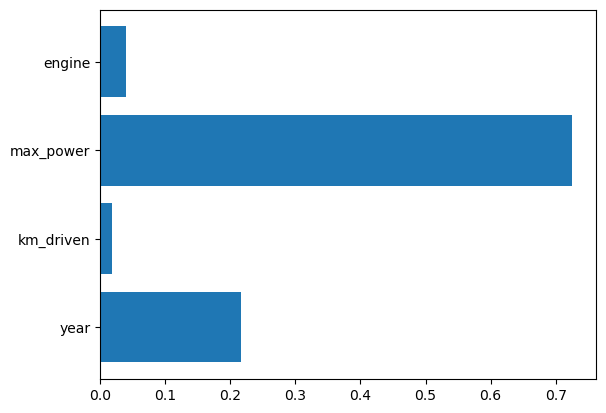

In [59]:
plt.barh(X.columns, rf.feature_importances_)

## After conducting the exploratory data analysis and applying various machine learning algorithms, we can see some features play a crucial role in predicting the selling_price of cars. Noticeable, features such as year, km_driven, fuel_type, max_power and engine as significant contributors to the model's performance. These features likely closely with the car's value because they directly reflect the vehicle's condition, power, and efficiency. By contrast, the seats and owner feature showed minimal impact on the model's accuracy. Addionally, seller_type feature have impact also on selling_price. For example, when we buy a car directly from individual, it will be cheaper than throught seller.

## The RandomForestRegressor is the best-performing model among those tested, although the performance of all models is suboptimal (since the error values are very large).On the other hand, linear regression and SVR underperformed.